In [259]:
import pandas as pd

df_2019 = pd.read_csv("datasets/filtered_dataset_2019.csv")
df_2019.describe()

,Unnamed: 0,Respondent,YearsCode,YearsCodePro,ConvertedComp
count,62457.000000,62457.000000,62014.000000,61891.000000,4.827600e+04
mean,44192.836479,44467.249980,13.104041,8.459825,1.288033e+05
std,25514.065333,25680.202904,8.761944,7.315023,2.845778e+05
min,4.000000,5.000000,1.000000,1.000000,0.000000e+00
25%,22025.000000,22143.000000,7.000000,3.000000,2.739600e+04
50%,44232.000000,44513.000000,10.000000,6.000000,5.843300e+04
75%,66341.000000,66763.000000,18.000000,11.000000,1.019305e+05
max,88330.000000,88883.000000,50.000000,50.000000,2.000000e+06


In [260]:
# Drop all null values from the ConvertedComp column
df_2019.dropna(subset = ["ConvertedComp"], inplace = True)
df_2019.reset_index(inplace = True)
print("2019 Stack Overflow Developer Survey with null values removed from ConvertedComp\n")
df_2019.describe()

2019 Stack Overflow Developer Survey with null values removed from ConvertedComp



,index,Unnamed: 0,Respondent,YearsCode,YearsCodePro,ConvertedComp
count,48276.000000,48276.000000,48276.000000,48208.000000,48178.000000,4.827600e+04
mean,31256.171037,44232.740679,44507.419256,13.156592,8.387916,1.288033e+05
std,18017.647821,25496.778436,25662.804873,8.568200,7.108150,2.845778e+05
min,2.000000,8.000000,9.000000,1.000000,1.000000,0.000000e+00
25%,15672.750000,22101.750000,22221.750000,7.000000,3.000000,2.739600e+04
50%,31261.500000,44275.500000,44556.500000,10.000000,6.000000,5.843300e+04
75%,46835.500000,66331.500000,66753.500000,18.000000,11.000000,1.019305e+05
max,62456.000000,88330.000000,88883.000000,50.000000,50.000000,2.000000e+06


In [261]:
from scipy.stats import zscore

# Get the Z Score
z_scores = zscore(df_2019["ConvertedComp"])
print("The Z Scores:")
print(str(z_scores))

The Z Scores:
0       -0.118156
1       -0.405905
2       -0.136355
3       -0.252107
4        1.147497
           ...   
48271    0.004205
48272   -0.162753
48273   -0.211046
48274    1.613666
48275   -0.372093
Name: ConvertedComp, Length: 48276, dtype: float64


In [262]:
# Set the threshold for the Z Score to be 0.5
threshold = 0.5

# Remove all rows in the data frame if the Z Score is not in threshold
df_2019_no_outliers = df_2019[(abs(z_scores) < threshold)]

print("2019 Stack Overflow Developer Survey with no outlier values for ConvertedComp")
df_2019_no_outliers.describe()

2019 Stack Overflow Developer Survey with no outlier values for ConvertedComp


,index,Unnamed: 0,Respondent,YearsCode,YearsCodePro,ConvertedComp
count,44895.000000,44895.000000,44895.000000,44835.000000,44806.000000,44895.000000
mean,31258.334848,44235.860809,44510.567212,13.020453,8.289024,63914.925025
std,18016.302006,25494.879628,25660.894646,8.507900,7.051419,49660.172813
min,2.000000,8.000000,9.000000,1.000000,1.000000,0.000000
25%,15699.500000,22140.500000,22260.500000,7.000000,3.000000,24744.000000
50%,31283.000000,44307.000000,44590.000000,10.000000,6.000000,54200.000000
75%,46836.000000,66332.000000,66754.000000,17.000000,11.000000,90000.000000
max,62456.000000,88330.000000,88883.000000,50.000000,50.000000,270650.000000


In [263]:
from ydata_profiling import ProfileReport

# YData Profiling of filtered dataset to confirm acceptable number of outliers removed
# profile = ProfileReport(df_2019_no_outliers, title="Filtered Profile")
# profile.to_file('cleaned_data_report_2019.html')

In [264]:
# Replace long values that may be hard to read in visualisations
value_to_replace_1 = "I never completed any formal education"
replace_with_1 = "No formal education"
value_to_replace_2 = "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"
replace_with_2 = "Secondary school"
value_to_replace_3 = "Some college/university study without earning a degree"
replace_with_3 = "College/University (Incomplete)"
value_to_replace_4 = "Bachelor’s degree (BA, BS, B.Eng., etc.)"
replace_with_4 = "Bachelor's degree"
value_to_replace_5 = "Master’s degree (MA, MS, M.Eng., MBA, etc.)"
replace_with_5 = "Master's degree"
value_to_replace_6 = "Professional degree (JD, MD, etc.)"
replace_with_6 = "Professional degree"
value_to_replace_7 = "Other doctoral degree (Ph.D, Ed.D., etc.)"
replace_with_7 = "Doctoral degree"

df_2019_no_outliers["EdLevel"].replace(value_to_replace_1, replace_with_1, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_2, replace_with_2, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_3, replace_with_3, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_4, replace_with_4, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_5, replace_with_5, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_6, replace_with_6, inplace=True)
df_2019_no_outliers["EdLevel"].replace(value_to_replace_7, replace_with_7, inplace=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/2018433814.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"].replace(value_to_replace_1, replace_with_1, inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/2018433814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"].replace(value_to_replace_2, replace_with_2, inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/2018433814.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [265]:
# Associate an order with the ordinal variables

# EdLevel
order_ed_level = ["No formal education",
                  "Primary/elementary school",
                  "Secondary school",
                  "Associate degree",
                  "College/University (Incomplete)",
                  "Bachelor's degree",
                  "Master's degree",
                  "Professional degree",
                  "Doctoral degree"]

df_2019_no_outliers["EdLevel"] = pd.Categorical(df_2019_no_outliers["EdLevel"], categories=order_ed_level, ordered=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3504537172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"] = pd.Categorical(df_2019_no_outliers["EdLevel"], categories=order_ed_level, ordered=True)


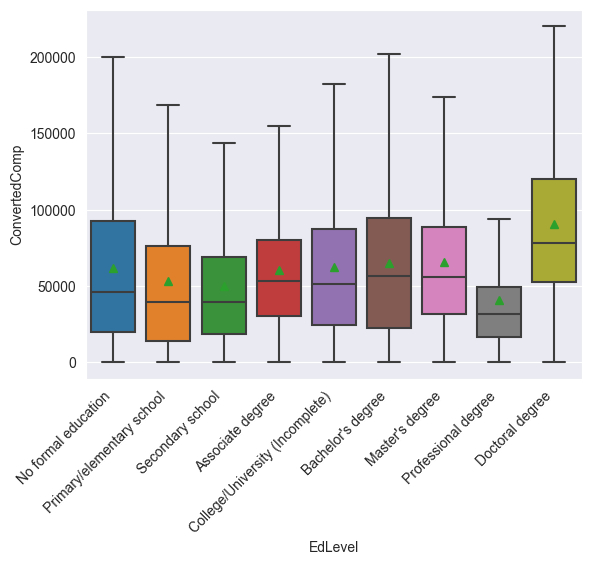

In [266]:
import seaborn as sns
from matplotlib import pyplot

box_plot_1 = sns.boxplot(df_2019_no_outliers, x="EdLevel", y="ConvertedComp", showmeans=True, sym="")
box_plot_1.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_1.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_1 = box_plot_1.get_figure()
figure_1.savefig("figures/2019/cleaned/cleaned_edlevel_convertedcomp-boxplot.png", bbox_inches="tight")

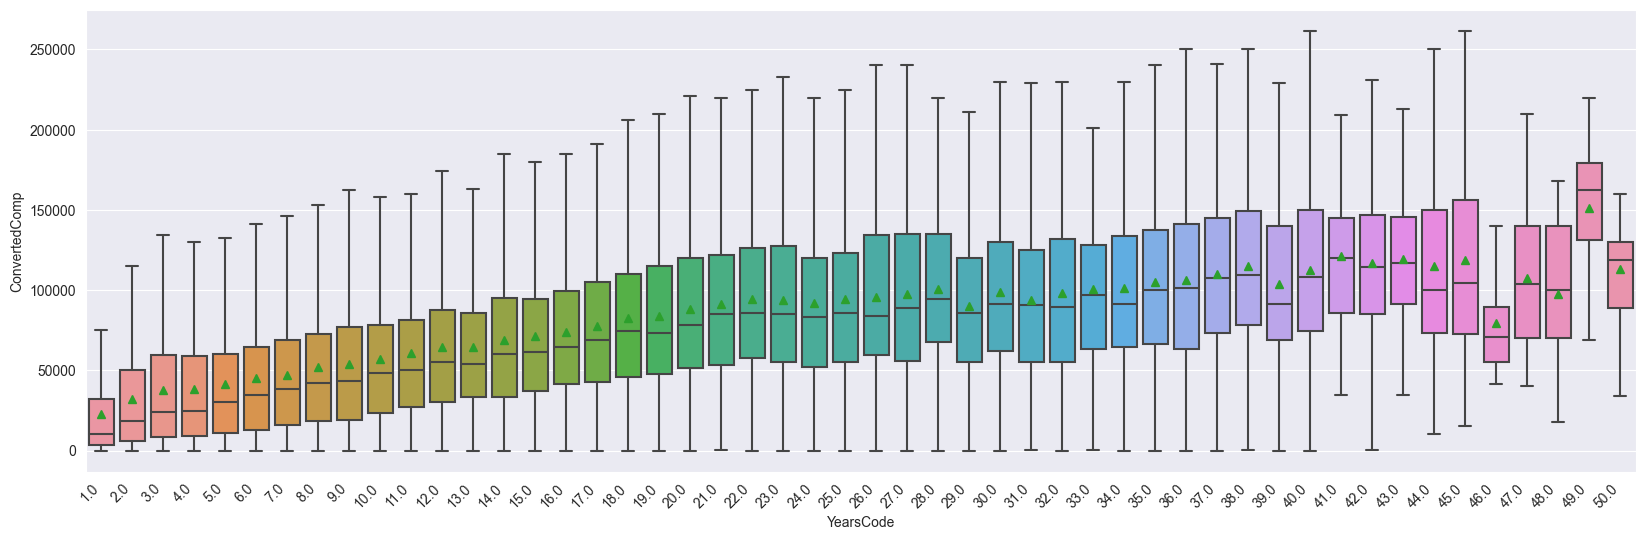

In [267]:
pyplot.figure(figsize=(20, 6))
box_plot_2 = sns.boxplot(df_2019_no_outliers, x="YearsCode", y="ConvertedComp", showmeans=True, sym="")
box_plot_2.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_2.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_2 = box_plot_2.get_figure()
figure_2.savefig("figures/2019/cleaned/cleaned_yearscode_convertedcomp-boxplot.png", bbox_inches="tight")

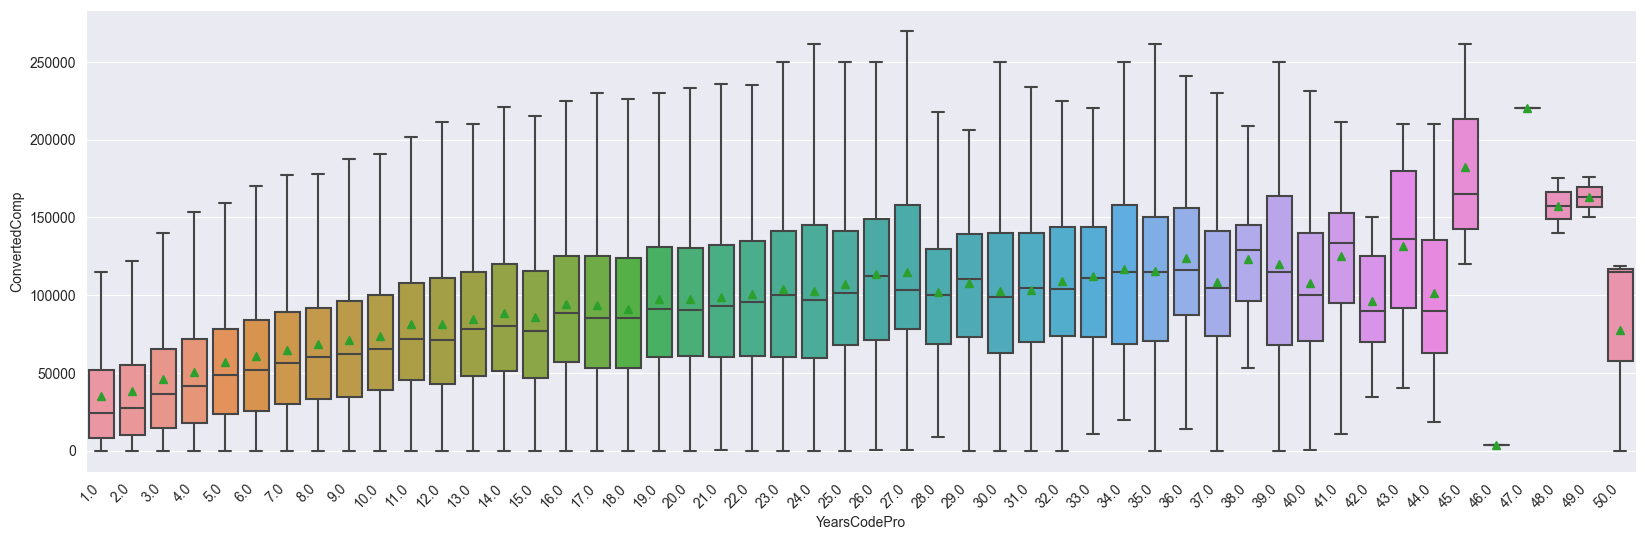

In [268]:
pyplot.figure(figsize=(20, 6))
box_plot_3 = sns.boxplot(df_2019_no_outliers, x="YearsCodePro", y="ConvertedComp", showmeans=True, sym="")
box_plot_3.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_3.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_3 = box_plot_3.get_figure()
figure_3.savefig("figures/2019/cleaned/cleaned_yearscodepro_convertedcomp-boxplot.png", bbox_inches="tight")

In [269]:
# Assign an order to the OrgSize column

order_org_size = ["Just me - I am a freelancer, sole proprietor, etc.",
                  "2-9 employees",
                  "10 to 19 employees",
                  "20 to 99 employees",
                  "100 to 499 employees",
                  "500 to 999 employees",
                  "1,000 to 4,999 employees",
                  "5,000 to 9,999 employees",
                  "10,000 or more employees"]

df_2019_no_outliers["OrgSize"] = pd.Categorical(df_2019_no_outliers["OrgSize"], categories=order_org_size, ordered=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3984396859.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["OrgSize"] = pd.Categorical(df_2019_no_outliers["OrgSize"], categories=order_org_size, ordered=True)


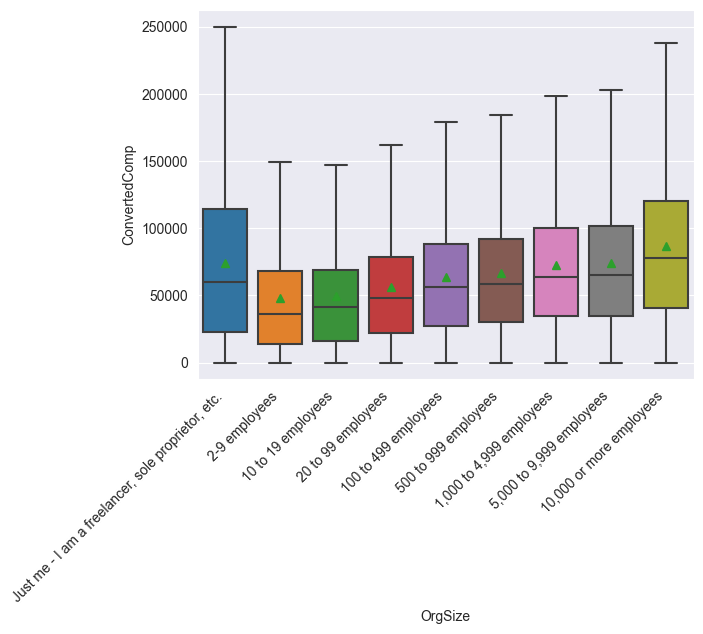

In [270]:
box_plot_4 = sns.boxplot(df_2019_no_outliers, x="OrgSize", y="ConvertedComp", showmeans=True, sym="")
box_plot_4.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_4.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_4 = box_plot_4.get_figure()
figure_4.savefig("figures/2019/cleaned/cleaned_orgsize_convertedcomp-boxplot.png", bbox_inches="tight")

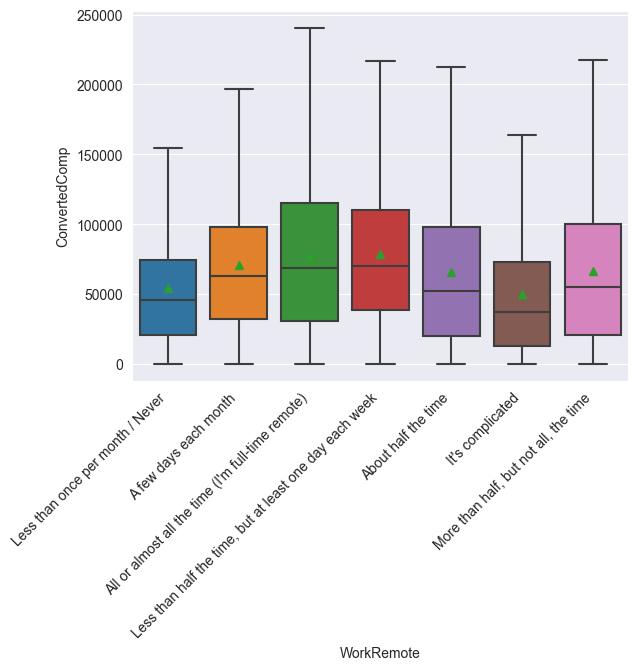

In [271]:
box_plot_5 = sns.boxplot(df_2019_no_outliers, x="WorkRemote", y="ConvertedComp", showmeans=True, sym="")
box_plot_5.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_5.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_5 = box_plot_5.get_figure()
figure_5.savefig("figures/2019/cleaned/cleaned_workremote_convertedcomp-boxplot.png", bbox_inches="tight")